#   Inferencial analysis

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

## Import des données

In [14]:
immo_df = pd.read_csv("immo_df2.csv")
immo_df

,index,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,localisation
0,2072.0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,4.0
1,10600.0,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,3.0
2,2494.0,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,4.0
3,4284.0,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,3.0
4,16541.0,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,4.0
...,...,...,...,...,...,...,...,...,...
16507,1099.0,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,4.0
16508,18898.0,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2.0
16509,11798.0,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,4.0
16510,6637.0,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3.0


## Premiére observation

In [15]:
immo= immo_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

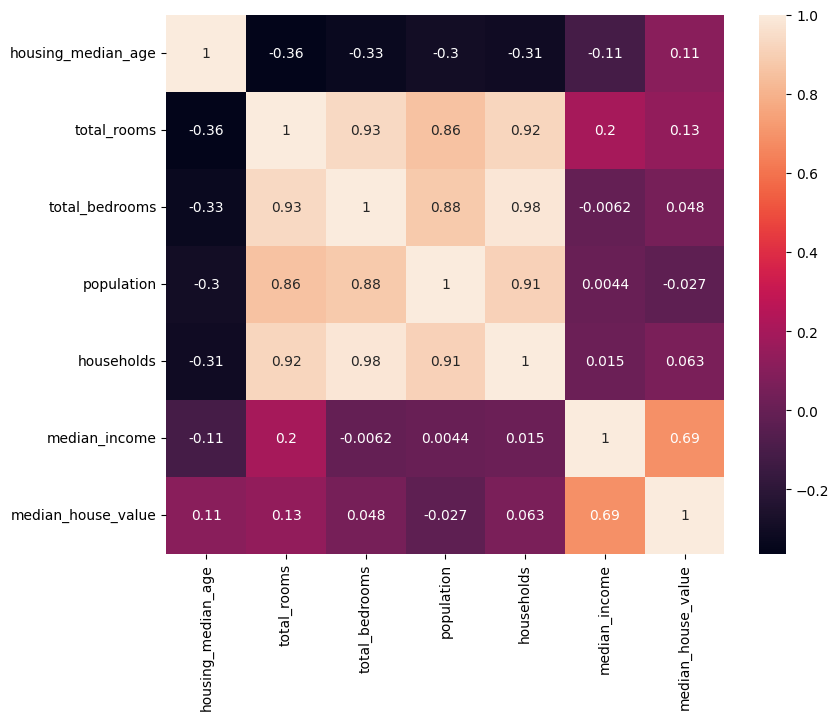

In [16]:
plt.figure(figsize=(9,7))
corr_matrix = immo.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Heatmap nous montre une correlation possible entre total_bedrooms/households(0.98), total_bedrooms/total_rooms (0.93),  total_rooms/households(0.92), population/households (0.91), total_bedrooms/population (0.88) et enfin population/total_rooms (0.86) et median_income/median_house_value (0.69). 

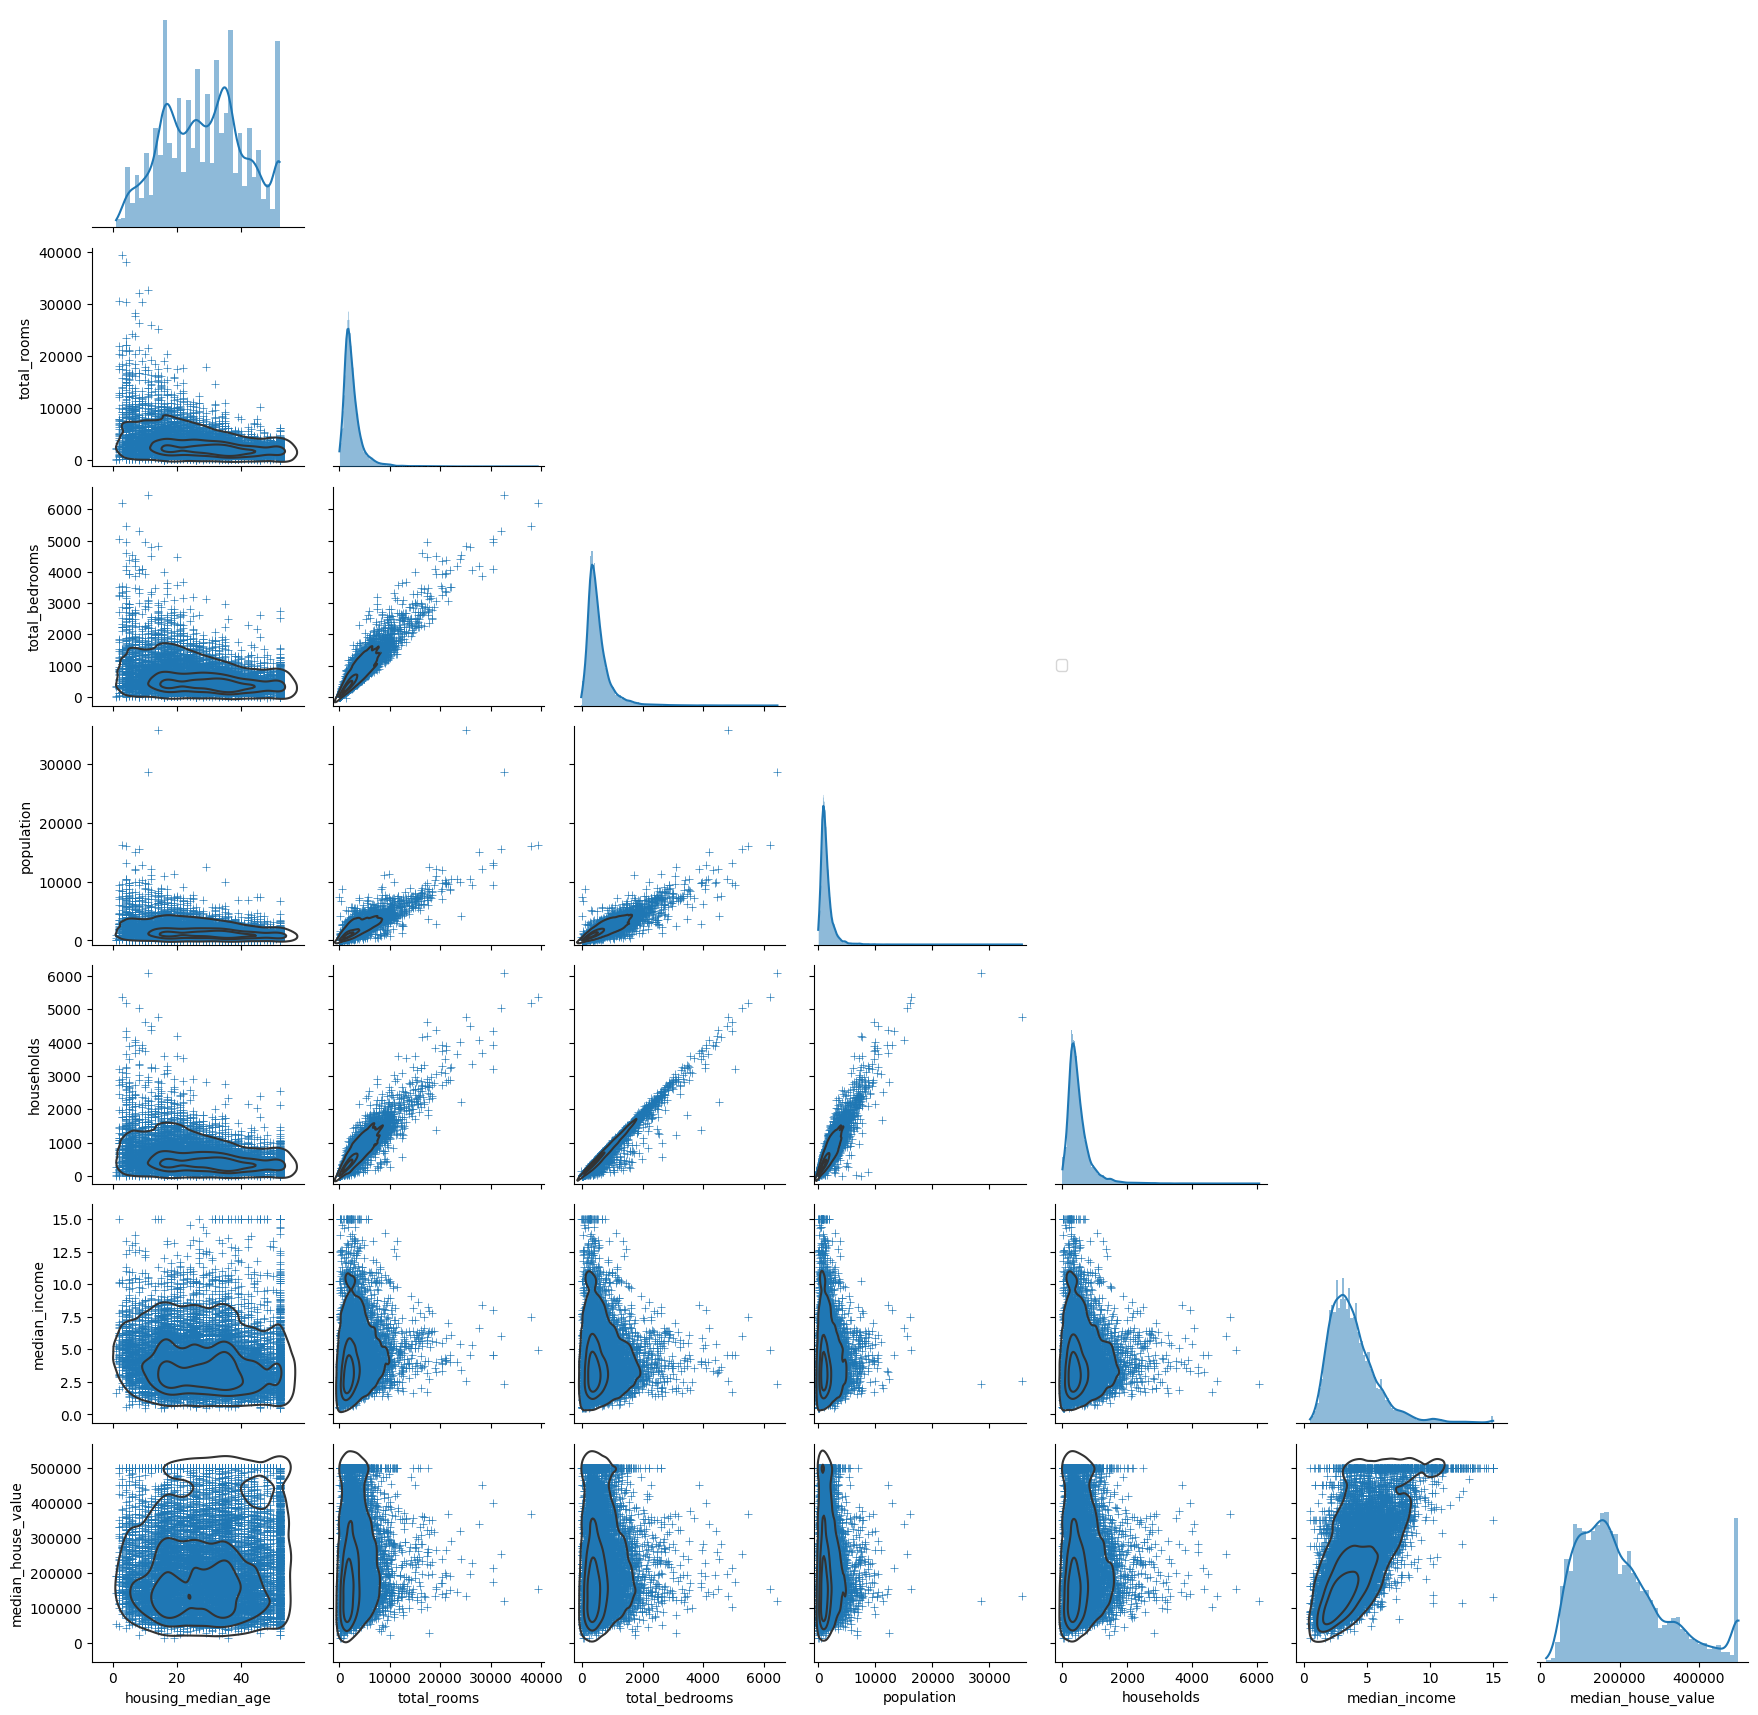

In [17]:
g = sns.PairGrid(data = immo, corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

Confirme ce que l'on a pu observé 

In [18]:
X= immo.copy()

In [19]:
y=immo_df[['localisation']]

In [20]:
ols = sm.OLS(y, sm.add_constant(X)).fit()

In [21]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           localisation   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     597.2
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:25:52   Log-Likelihood:                -21099.
No. Observations:               16512   AIC:                         4.221e+04
Df Residuals:                   16504   BIC:                         4.228e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9088      0.029    135.095      0.000       3.852       3.966
housing_median_age    -0.0108      0.001    -17.939      0.000      -0.012      -0.010
total_rooms            0.0001   1.08e-05     12.198      0.000       0.000       0.000
total_bedrooms      7.811e-05   9.66e-05      0.809      0.419      -0.000       0.000
population         -1.832e-05   1.49e-05     -1.233      0.218   -4.74e-05    1.08e-05
households            -0.0008      0.000     -7.723      0.000      -0.001      -0.001
median_income          0.0432      0.006      7.037      0.000       0.031       0.055
median_house_value -3.797e-06   8.93e-08    -42.523      0.000   -3.97e-06   -3.62e-06
==============================================================================
Omnibus:                     2281.987   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3337.174
Skew:                          -1.067   Prob(JB):                         0.00
Kurtosis:                       3.541   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ols.params 

const                 3.908838
housing_median_age   -0.010808
total_rooms           0.000132
total_bedrooms        0.000078
population           -0.000018
households           -0.000797
median_income         0.043224
median_house_value   -0.000004
dtype: float64

In [23]:
pd.set_option('display.float_format', '{:.4f}'.format)
coefs_with_p_value = ols.pvalues.to_frame(name='p-values').iloc[1:]
coefs_with_p_value

,p-values
housing_median_age,0.0000
total_rooms,0.0000
total_bedrooms,0.4186
population,0.2177
households,0.0000
median_income,0.0000
median_house_value,0.0000
